**Learning Python -- The Programming Language for Artificial Intelligence and Data Science**

**Lecture: Working with Files in Python**

**By Allen Y. Yang, PhD**

(c) Copyright Intelligent Racing Inc., 2020-2024. All rights reserved. Materials may NOT be distributed or used for any commercial purposes.

In this lecture, we will explore how Python handles file operations, from understanding computer storage hierarchy to practical file reading and writing operations. Files are essential for persistent data storage, allowing programs to save and retrieve information between sessions. We'll cover text files, binary files, and even image files, providing you with a comprehensive understanding of file handling in Python.

# Keywords

* **File System**: A method for organizing and storing files on persistent storage devices that retains data when power is turned off.
* **Path**: The location of a file or directory in the file system hierarchy, expressed as a string.
* **File Handle**: An object that provides methods for interacting with an open file.
* **Binary File**: A file that stores data in binary format (0s and 1s) rather than human-readable text.
* **Text File**: A file that stores data as human-readable characters using a specific encoding (like UTF-8).
* **File Mode**: Specifies how a file should be opened (read, write, append, etc.).
* **Persistent Storage**: Storage that retains data even when the computer is powered off.

# Computer Storage Hierarchy

Before diving into file operations, it's important to understand where files fit in the computer storage hierarchy. Computer storage is organized in four tiers:

1. **CPU Registers**: Located inside the processor with the fastest access speed but very limited size
2. **Main Memory (RAM)**: Random-access memory with fast speed (GB/sec) but data is lost when power is off
3. **File System**: Persistent storage that retains data when powered off, but much slower than RAM
4. **Offline Storage**: Long-term storage like tape drives or cloud storage, virtually unlimited but requires manual intervention

Files live in the third tier - the file system. While slower than RAM, files provide the crucial ability to persist data between program runs.

# File Paths and the OS Module

Python's `os` module provides a portable way to work with file paths across different operating systems. Let's explore the key functions:

In [2]:
import os

# Get the absolute path of the current script
current_file = os.path.abspath(__file__) if '__file__' in globals() else 'example.py'
print(f"Current file absolute path: {current_file}")

# Get the directory containing the file
directory = os.path.dirname(current_file)
print(f"Directory: {directory}")

# Get the current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

Current file absolute path: example.py
Directory: 
Current working directory: /Users/yang/Documents/GitHub/ROAR-Academy/Part Two/notebooks


In [3]:
import os

# Check if a path exists
path_to_check = "."
exists = os.path.exists(path_to_check)
print(f"Does '{path_to_check}' exist? {exists}")

# List contents of current directory
contents = os.listdir(".")
print("\nContents of current directory:")
for item in contents[:5]:  # Show first 5 items
    print(f"  - {item}")

Does '.' exist? True

Contents of current directory:
  - 2-1-files.ipynb


## Path Differences Between Operating Systems

**Unix-like Systems (Linux, macOS):**
- Root directory: `/`
- Path separator: `/`
- Home directory: `/home/username` or `/Users/username`
- Example: `/home/user/projects/learn_python/test.py`

**Windows:**
- Volume letters: `C:`, `D:`, etc.
- Path separator: `` (appears as `` in Python strings)
- Example: `C:Usersusernameprojectslearn_pythontest.py`

# Reading and Writing Text Files

Text files are the most common type of files you'll work with. Python makes it easy to read and write text files using the `open()` function.

In [4]:
# Writing to a text file
filename = "example.txt"

# Method 1: Using try-except-finally
try:
    file_handle = open(filename, 'w')
    file_handle.write("Hello, Python!\n")
    file_handle.write("This is a test file.\n")
    file_handle.write("We are learning file operations.\n")
except IOError as e:
    print(f"Error writing file: {e}")
finally:
    file_handle.close()
    
print(f"Successfully wrote to {filename}")

Successfully wrote to example.txt


In [5]:
# Method 2: Using with statement (recommended)
# The 'with' statement automatically closes the file
with open(filename, 'r') as file_handle:
    content = file_handle.read()
    print("File contents:")
    print(content)

File contents:
Hello, Python!
This is a test file.
We are learning file operations.



In [6]:
# Reading line by line
print("Reading line by line:")
with open(filename, 'r') as file_handle:
    for line_num, line in enumerate(file_handle, 1):
        print(f"Line {line_num}: {line.strip()}")

Reading line by line:
Line 1: Hello, Python!
Line 2: This is a test file.
Line 3: We are learning file operations.


## File Modes

When opening a file, you can specify different modes:

- `'r'`: Read (default) - file must exist
- `'w'`: Write - creates new file or overwrites existing
- `'a'`: Append - adds to the end of existing file
- `'x'`: Exclusive creation - fails if file exists
- `'b'`: Binary mode (e.g., `'rb'`, `'wb'`)
- `'+'`: Update mode (read and write)

In [7]:
# Appending to a file
with open(filename, 'a') as file_handle:
    file_handle.write("This line was appended.\n")
    
# Read to verify
with open(filename, 'r') as file_handle:
    print("Updated file contents:")
    print(file_handle.read())

Updated file contents:
Hello, Python!
This is a test file.
We are learning file operations.
This line was appended.



# Working with Binary Files

Binary files store data in a format that's not human-readable but is more efficient for certain types of data. Let's work with binary files using MD5 hashing as an example:

In [8]:
import hashlib

# Create some sample data and compute its MD5 hash
text_data = "This is some sample text for hashing."
md5_hash = hashlib.md5()

# Convert string to bytes and update hash
md5_hash.update(text_data.encode('utf-8'))
hash_digest = md5_hash.digest()  # Binary hash
hash_hex = md5_hash.hexdigest()  # Hexadecimal string

print(f"Original text: {text_data}")
print(f"MD5 hash (hex): {hash_hex}")
print(f"MD5 hash (bytes): {hash_digest}")

Original text: This is some sample text for hashing.
MD5 hash (hex): 857ab47e9811ffc59921d89bfdc5db8c
MD5 hash (bytes): b'\x85z\xb4~\x98\x11\xff\xc5\x99!\xd8\x9b\xfd\xc5\xdb\x8c'


In [9]:
# Write binary data to file
binary_filename = "hash_data.bin"

with open(binary_filename, 'wb') as binary_file:
    binary_file.write(hash_digest)
    
print(f"Wrote {len(hash_digest)} bytes to {binary_filename}")

# Read binary data back
with open(binary_filename, 'rb') as binary_file:
    read_data = binary_file.read()
    
print(f"Read back: {read_data}")
print(f"Data matches: {read_data == hash_digest}")

Wrote 16 bytes to hash_data.bin
Read back: b'\x85z\xb4~\x98\x11\xff\xc5\x99!\xd8\x9b\xfd\xc5\xdb\x8c'
Data matches: True


In [ ]:
# Using seek to navigate in a file
with open(binary_filename, 'rb+') as binary_file:
    # Read first 8 bytes
    first_part = binary_file.read(8)
    print(f"First 8 bytes: {first_part}")
    
    # Seek back to beginning
    binary_file.seek(0)
    
    # Read all again
    all_data = binary_file.read()
    print(f"All data: {all_data}")


### Working with Image Files: `lenna.bmp` Using Custom Python Script

In this section, we demonstrate how to work with image files using a custom Python script. The example below uses the classic `lenna.bmp` image, and the script `read_image.py` demonstrates how to load and display this image using the Pillow (PIL) and Matplotlib libraries.

#### Code Explanation:
- `PIL.Image.open` is used to open the image file.
- `matplotlib.pyplot.imshow` displays the image in a plot.
- `plt.axis('off')` removes axis ticks for a cleaner view.
- `plt.title` adds a title to the image window.
- The `main()` function encapsulates the workflow and allows direct script execution.

This is a modular and reusable way to read and visualize images in Python.


Image type is:  <class 'numpy.ndarray'>
Image shape is:  (512, 512, 3)


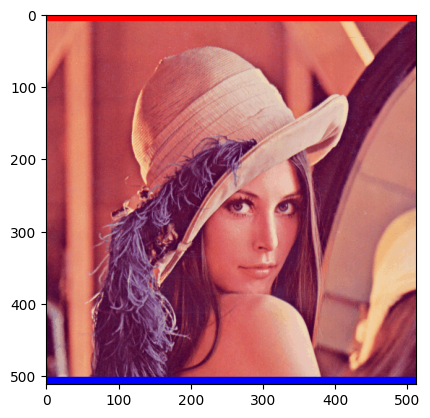

In [2]:
## This is course material for Introduction to Python Scientific Programming
## Example code: read_image.py
## Author: Allen Y. Yang
##
## (c) Copyright 2020. Intelligent Racing Inc. Not permitted for commercial use

# Please do <pip3 install matplotlib> and <pip3 install pillow> first
from matplotlib import image
from matplotlib import pyplot
import os

# Read an image file
path = os.path.abspath(__file__) if '__file__' in globals() else '.'
filename = path + '/' + 'lenna.bmp'
data = image.imread(filename)

# Display image information
print('Image type is: ', type(data))
print('Image shape is: ', data.shape)

# Add some color boundaries to modify an image array
plot_data = data.copy()
for width in range(512):
    for height in range(10):
        plot_data[height][width] = [255, 0, 0]   # Alternatively plot_data[height][width][:] = [255, 0, 0]
        plot_data[511-height][width] = [0,0,255]

# Write the modified images
image.imsave(path+'/'+'lenna-mod.jpg', plot_data)

# use pyplot to plot the image
pyplot.imshow(plot_data)
pyplot.show()

# Best Practices for File Handling

1. **Always use the `with` statement** when possible - it automatically closes files
2. **Handle exceptions** - files might not exist or you might not have permissions
3. **Use appropriate modes** - don't open in write mode if you only need to read
4. **Be careful with paths** - use `os.path` for cross-platform compatibility
5. **Close files explicitly** if not using `with` statement
6. **Consider encoding** for text files (default is usually UTF-8)

In [3]:
# Example of robust file handling
def safe_read_file(filename):
    """Safely read a file with proper error handling."""
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            return f.read()
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except PermissionError:
        print(f"Error: No permission to read '{filename}'.")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

# Test the function
content = safe_read_file("example.txt")
if content:
    print("File read successfully!")
    print(f"First 50 characters: {content[:50]}...")

File read successfully!
First 50 characters: Hello, Python!
This is a test file.
We are learnin...


# Summary

* **File Systems** provide persistent storage in the computer storage hierarchy
* The **os module** offers portable functions for working with file paths
* **Text files** can be read/written using `open()` with modes like 'r', 'w', 'a'
* **Binary files** use 'b' mode and work with bytes instead of strings
* **Image files** are special binary files that can be manipulated as multi-dimensional arrays
* Always use proper error handling and close files when done
* The `with` statement is the recommended way to handle files in Python

# Exercises

## Exercise 1
Write a program that creates a text file called "numbers.txt" containing the numbers 1 to 10, each on a new line. Then read the file and calculate the sum of all numbers.

## Exercise 2
Create a function that counts the number of words in a text file. Test it with the "example.txt" file created earlier.

## Exercise 3
Write a program that reads a text file and creates a new file with all the text converted to uppercase. Handle the case where the input file doesn't exist.

## Exercise 4
Create a simple program that saves a dictionary to a file in JSON format and then reads it back. Use the `json` module.

## Exercise 5
Debug: Fix the following code that attempts to read a file but has errors.

In [ ]:
# Buggy code - fix this!
file = open('myfile.txt')
data = file.readline
print(data)
# Missing something important here...


## Expanded Discussion: Working with Files in Python

Python provides multiple ways to work with files, which is essential for tasks like data logging, configuration, or reading data from datasets.

### File Modes
When opening a file with the `open()` function, you can specify the mode:
- `'r'` – Read (default): Opens a file for reading, error if the file does not exist.
- `'w'` – Write: Creates a new file or truncates existing file to write.
- `'a'` – Append: Adds content to the end of a file if it exists.
- `'b'` – Binary mode: Used with other modes, e.g., `'rb'` or `'wb'`.
- `'+'` – Read and Write: e.g., `'r+'`, `'w+'`.

### Context Manager
Using the `with` statement ensures files are properly closed after their suite finishes:
```python
with open('example.txt', 'r') as file:
    content = file.read()
```

### Reading Files
- `read()`: Reads entire file.
- `readline()`: Reads one line at a time.
- `readlines()`: Reads all lines and returns a list.

### Writing to Files
```python
with open('example.txt', 'w') as file:
    file.write('Hello, world!')
```

### Best Practices
- Always use the context manager (`with`).
- Handle file exceptions using `try-except`.
- Validate file existence using `os.path.exists()`.

Understanding how to use files is crucial for working with persistent data, especially when building data pipelines or logging AI/ML results.
